# Salaries - Exploratory Data Analysis (EDA)

Conduct EDA on Job Salaries to examine relationships between variables and other patterns in the data



* Import relevant libraries
* Load the data
* Exploring the data
* Choosing a dependent variable

### Imports

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
import os
import statsmodels.api as sm
import scipy.stats as ss
import itertools

from library.sb_utils import save_file

In [2]:
train_data = pd.read_csv('Train_rev1.csv')

### Cleanup

In [3]:
def scrub_data(data, columns, axis, vals, names):
    #drop useless columns
    data = data.drop(columns, axis = 1)
    #detect the missing data
    missingcounts = data.isnull().sum()
    missingcols = [col for col in missingcounts.keys() if missingcounts[col] != 0]
    #fill the missing data with specific values
    values = dict(zip(missingcols, vals))
    data = data.fillna(value = values)
    #rename the columns
    data.columns = names
    return data

In [4]:
#fill missing data for "ContractType", "ContractTime", "Company" with Unknown
train_data = train_data.fillna("Unknown")

#rename the columns
names = ["Job Code", "Title", "Job Description", "Region", "Location", "ContractType", "ContractTime", "Company", "Category", "Salary_Range", "Salary","Source_Name"]
train_data.columns = names


### Examine the Data

In [5]:
print(train_data.shape)
train_data.head(10)

(244768, 12)


,Job Code,Title,Job Description,Region,Location,ContractType,ContractTime,Company,Category,Salary_Range,Salary,Source_Name
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,Unknown,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,Unknown,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,Unknown,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,Unknown,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,Unknown,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
5,13179816,Engineering Systems Analyst Water Industry,Engineering Systems Analyst Water Industry Loc...,"Dorking, Surrey, Surrey, Surrey",Dorking,Unknown,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20K to 30K,25000,cv-library.co.uk
6,14131336,Senior Subsea Pipeline Integrity Engineer,A globally renowned engineering and training c...,"Aberdeen, Borders",UK,Unknown,permanent,Indigo 21 Ltd,Engineering Jobs,50000 - 100000/annum,75000,cv-library.co.uk
7,14663196,RECRUITMENT CONSULTANT INDUSTRIAL / COMMERCIA...,THIS IS A LIVE VACANCY NOT A GENERIC ADVERTISE...,"MANCHESTER, Greater Manchester",Manchester,Unknown,permanent,Code Blue Recruitment,HR & Recruitment Jobs,18000 - 26000/annum TO 26K BASIC + COMM + BENS,22000,cv-library.co.uk
8,14663197,RECRUITMENT CONSULTANT CONSTRUCTION / TECHNIC...,This is an exceptional opportunity to join a c...,"LEEDS, West Yorkshire",Leeds,Unknown,permanent,Code Blue Recruitment,HR & Recruitment Jobs,18000 - 28000/annum 18 - 28K BASIC + COMM + BENS,23000,cv-library.co.uk
9,15395797,Subsea Cables Engineer,A subsea engineering company is looking for an...,"Aberdeen, UK",Aberdeen,Unknown,permanent,Indigo 21 Ltd,Engineering Jobs,70000 - 100000/annum,85000,cv-library.co.uk


### Use .info() to see length and dtypes

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Job Code         244768 non-null  int64 
 1   Title            244768 non-null  object
 2   Job Description  244768 non-null  object
 3   Region           244768 non-null  object
 4   Location         244768 non-null  object
 5   ContractType     244768 non-null  object
 6   ContractTime     244768 non-null  object
 7   Company          244768 non-null  object
 8   Category         244768 non-null  object
 9   Salary_Range     244768 non-null  object
 10  Salary           244768 non-null  int64 
 11  Source_Name      244768 non-null  object
dtypes: int64(2), object(10)
memory usage: 22.4+ MB


### Check for duplicates

In [7]:
train_data.duplicated().sum()

0

### Check for missing values

In [8]:
#Function that calculates percentage of missing data per column
def missingData(dataframe):
    missing = False
    for item in (dataframe.isnull().sum()).iteritems():
        if item[1] > 0:
            print('Missing Data percentage for '+item[0]+' is {:2.2%}'.format((item[1]/dataframe.shape[0])) )
            missing = True
    if not missing:
        print('Found no missing values.')

In [9]:
missingData(train_data)

Found no missing values.


### Identify numerical and categorical variables

In [10]:
train_data.columns

Index(['Job Code', 'Title', 'Job Description', 'Region', 'Location',
       'ContractType', 'ContractTime', 'Company', 'Category', 'Salary_Range',
       'Salary', 'Source_Name'],
      dtype='object')

In [11]:
numeric_cols = ['Job Code','Salary']

In [12]:
categorical_cols = ['Title', 'Job Description', 'Region', 'Location',
       'ContractType', 'ContractTime', 'Company', 'Category', 'Salary_Range', 'Source_Name']

### Summarize numerical and categorical variables separately

In [13]:
train_data.describe(include=[np.number])

,Job Code,Salary
count,2.447680e+05,244768.000000
mean,6.970142e+07,34122.577576
std,3.129813e+06,17640.543124
min,1.261263e+07,5000.000000
25%,6.869550e+07,21500.000000
50%,6.993700e+07,30000.000000
75%,7.162606e+07,42500.000000
max,7.270524e+07,200000.000000


In [14]:
train_data.describe(include = ['O'])

,Title,Job Description,Region,Location,ContractType,ContractTime,Company,Category,Salary_Range,Source_Name
count,244768,244768,244768,244768,244768,244768,244768,244768,244768,244768
unique,135436,242138,20986,2732,3,3,20812,29,97286,168
top,Business Development Manager,What is expected of you as a Registered Nurse ...,London,UK,Unknown,permanent,Unknown,IT Jobs,"50,000-74,999 yearly",totaljobs.com
freq,921,18,15605,41093,179326,151521,32434,38483,1923,48149


### Visualize target variable (salary) - Check for outliers 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


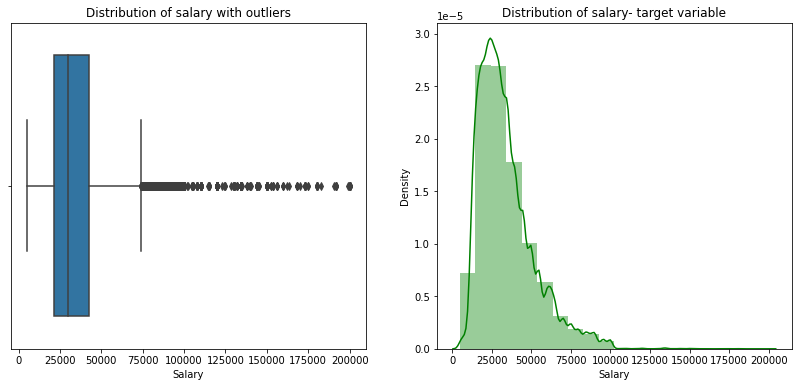

In [15]:
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(train_data.Salary)
plt.title("Distribution of salary with outliers")
plt.subplot(1,2,2)
sns.distplot(train_data['Salary'], bins=20, color = "Green")
plt.title("Distribution of salary- target variable")
plt.show()

### Use IQR rule to identify potential outliers

In [16]:
# Verification on outliers

def cal_upper_lower(col):
    sorted(col)
    q1,q3 = col.quantile([0.25, 0.75])
    IQR = q3-q1
    upper = q3 + (1.5 * IQR)
    lower = q1 - (1.5 * IQR)
    return upper, lower

highsal, lowsal = cal_upper_lower(train_data['Salary'])
print("The upper and lower salary are {} and {} :" .format(highsal, lowsal))

The upper and lower salary are 74000.0 and -10000.0 :


In [17]:
stat = train_data.Salary.describe()
print(stat)

count    244768.000000
mean      34122.577576
std       17640.543124
min        5000.000000
25%       21500.000000
50%       30000.000000
75%       42500.000000
max      200000.000000
Name: Salary, dtype: float64


In [18]:
train_data[train_data['Salary'] > 100005.5 ]

,Job Code,Title,Job Description,Region,Location,ContractType,ContractTime,Company,Category,Salary_Range,Salary,Source_Name
228,46626980,OOH GP Job Ipswich,OOH GP Job Ipswich “MedCo (Europe) Ltd are cur...,"Ipswich, Suffolk",Ipswich,Unknown,Unknown,Unknown,Healthcare & Nursing Jobs,75.00 to 75.00 per hour,144000,careworx.co.uk
229,46626981,OOH GP Job Clevedon,OOH GP Job Clevedon “MedCo (Europe) Ltd are cu...,"Clevedon, Somerset",Clevedon,Unknown,Unknown,Unknown,Healthcare & Nursing Jobs,75.00 to 75.00 per hour,144000,careworx.co.uk
2390,55048296,Quant Modeller Credit,The primary focus of the position is on risk n...,London,London,Unknown,Unknown,The Emerald Group,Accounting & Finance Jobs,"Up to 150,000 basic + excellent bonus",150000,eFinancialCareers
3466,58501895,"LOCUM GP’s WANTED IN HIGH WYCOME, BUCKINGHAMSH...","Location: High Wycombe, Buckinghamshire Start:...","High Wycombe, Buckinghamshire",High Wycombe,part_time,Unknown,Unknown,Healthcare & Nursing Jobs,70 to 70 per hour,134400,careworx.co.uk
4395,61728786,"Locum GP’s required, Ongoing, ****/Day, Readin...","Location: Reading, Berkshire Start: Asap End: ...","Reading, Berkshire",Reading,Unknown,Unknown,Unknown,Healthcare & Nursing Jobs,70 to 70 per hour,134400,careworx.co.uk
...,...,...,...,...,...,...,...,...,...,...,...,...
240361,72650075,Project Manager Operations Tier **** Investm...,"To be successful in this position, you will de...",London,London,Unknown,Unknown,Not disclosed,Accounting & Finance Jobs,"Up to 110,000 Base Salary",110000,eFinancialCareers
240535,72661652,Head of Accounts Security Cleared,A Central Government Department are looking to...,London,London,full_time,contract,PSD Group,Accounting & Finance Jobs,From 550 to 550 per day + 550 per day,132000,GAAPweb
242376,72688311,Digital Lead Engineer,Digital Lead Engineer Market leading opportuni...,Edinburgh,Edinburgh,Unknown,permanent,Carlyle Associates Limited,IT Jobs,"Up to 150,000 package",150000,jobsite.co.uk
242379,72688372,Development Manager Market Risk,"Market Risk, Technical Architect, Development ...",London,London,Unknown,permanent,McGregor Boyall Associates Ltd,IT Jobs,110k+ excellent benefits,110000,jobsite.co.uk


### Examine potential outliers

In [19]:
train_data.loc[train_data['Salary'] > 100005.5, 'Category' ].value_counts()

Healthcare & Nursing Jobs           105
Accounting & Finance Jobs            75
Legal Jobs                           32
IT Jobs                              26
Engineering Jobs                     14
Energy, Oil & Gas Jobs                8
Trade & Construction Jobs             8
Other/General Jobs                    5
Teaching Jobs                         4
Consultancy Jobs                      3
PR, Advertising & Marketing Jobs      3
Hospitality & Catering Jobs           3
Admin Jobs                            2
Retail Jobs                           2
Sales Jobs                            2
Manufacturing Jobs                    2
Scientific & QA Jobs                  1
Travel Jobs                           1
Graduate Jobs                         1
Name: Category, dtype: int64

In [20]:
train_data.loc[(train_data['Salary'] > 100005.5) & (train_data['Category'] == 'Scientific & QA Jobs'), 'ContractTime'] .value_counts()

contract    1
Name: ContractTime, dtype: int64

In [21]:
train_data.loc[(train_data['Salary'] > 100005.5) & (train_data['Category'] == 'Scientific & QA Jobs'), 'Salary_Range'] .value_counts()

72 - 72 UK Pounds/hour    1
Name: Salary_Range, dtype: int64

In [22]:
# Check most suspicious potential outliers above upper bound
train_data[(train_data.Salary > 180005.5) & (train_data.Category == 'IT Jobs')]

,Job Code,Title,Job Description,Region,Location,ContractType,ContractTime,Company,Category,Salary_Range,Salary,Source_Name
214389,72239547,IT Apprentice/Trainee Photocopy Engineer,The ideal candidate will have completed their ...,Heckmondwike West Yorkshire Yorkshire,Heckmondwike,Unknown,permanent,Baltic Training Services,IT Jobs,99.38 - 99.38 per hour,190809,totaljobs.com


In [23]:
# Check most suspicious potential outliers above upper bound
train_data[(train_data.Salary > 190005.5) & (train_data.Category == 'Healthcare & Nursing Jobs')]

,Job Code,Title,Job Description,Region,Location,ContractType,ContractTime,Company,Category,Salary_Range,Salary,Source_Name
128076,70084222,Programme Manager Payments Jobs In Scotland,"Our client, a large financial services client,...",Edinburgh and Lothians,UK,Unknown,contract,Head Resourcing Ltd,Healthcare & Nursing Jobs,Up to 800 Per Day,192000,jobsinscotland.com
145862,70699061,Are you a Locum GP looking for work in Walk in...,At Medco Services we pride ourselves on the ex...,National,UK,part_time,Unknown,Medco Services,Healthcare & Nursing Jobs,Upto 100 p/h,192000,jobs.gponline.com
234479,72492052,Locum GPs Needed Nationwide Calling All Newly...,Locum Select provides a comprehensive service ...,Nationwide,UK,Unknown,Unknown,Locum Select,Healthcare & Nursing Jobs,Up to 100 per hr,192000,jobs.gponline.com


The high-salary potential outliers all appear to be legitimate data. Most roles are I.T, engineering and executive roles  in industries that are well known for high salaries. We determine these entries to be legitimate and will not remove them.

In [24]:
def plot_feature(df, col):
    '''
    Make plot for each features
    left, the distribution of samples on the feature
    right, the dependance of salary on the feature
    '''
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        #change the categorical variable to category type and order their level by the mean salary
        #in each category
        mean = df.groupby(col)['Salary'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        df[col].value_counts().plot()
    plt.xticks(rotation=90)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1, 2, 2)

    if df[col].dtype == 'int64' or col == 'companyId':
        #plot the mean salary for each category and fill between the (mean - std, mean + std)
        mean = df.groupby(col)['Salary'].mean()
        std = df.groupby(col)['Salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
    else:
        sns.boxplot(x = col, y = 'Salary', data=df)
    
    plt.xticks(rotation=90)
    plt.ylabel('Salary')
    plt.show()

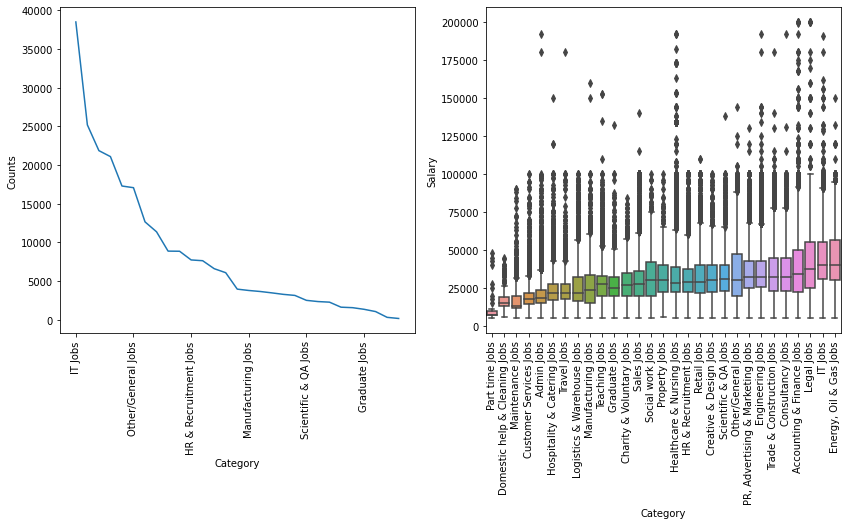

In [25]:
plot_feature(train_data, 'Category')

There is a clear positive correlation between job category and salary

### Visually exploring the relationship between the feature variables and the target

In [26]:
#this function is used to get correlation between categorical features

def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorical-categorical association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))


In [27]:
cols = ['Category','ContractTime', 'Salary_Range']
corrM = np.zeros((len(cols),len(cols)))
# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(train_data[col1], train_data[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

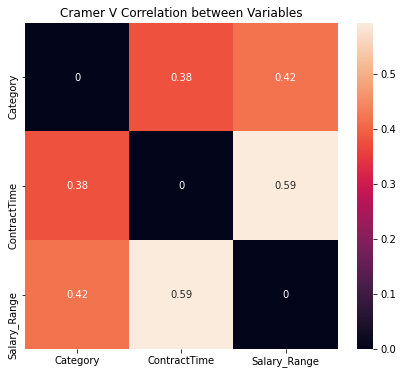

In [28]:
corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables");

We see that job Category has a moderate relationship with both Contract-time and Salary_range. 